===== HEAD =====
   Fabric  Season SkinTone Weather WorkLevel
0  Velvet  Winter     Fair    Cold       Low
1   Linen  Winter   Medium     Hot    Medium
2   Denim  Winter     Fair     Dry      High
3   Linen  Summer     Dark     Dry    Medium
4   Rayon  Summer   Medium     Dry       Low

===== INFO =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fabric     500 non-null    object
 1   Season     500 non-null    object
 2   SkinTone   500 non-null    object
 3   Weather    500 non-null    object
 4   WorkLevel  500 non-null    object
dtypes: object(5)
memory usage: 19.7+ KB
None

===== DESCRIBE =====
           Fabric  Season SkinTone Weather WorkLevel
count         500     500      500     500       500
unique         12       3        3       4         3
top     Polyester  Winter     Dark     Dry    Medium
freq          140     170      180    

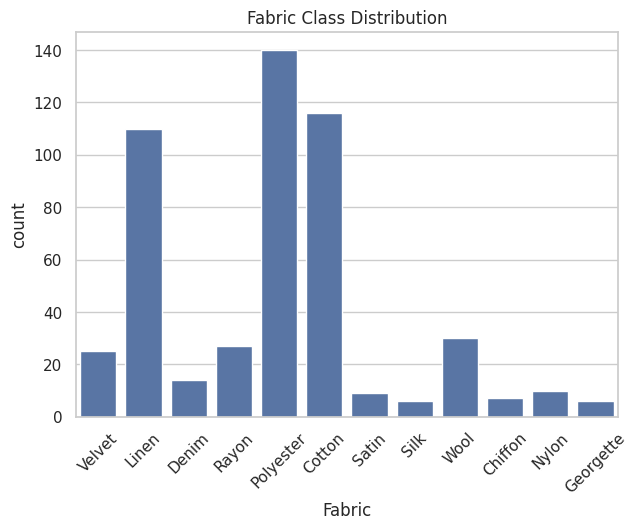

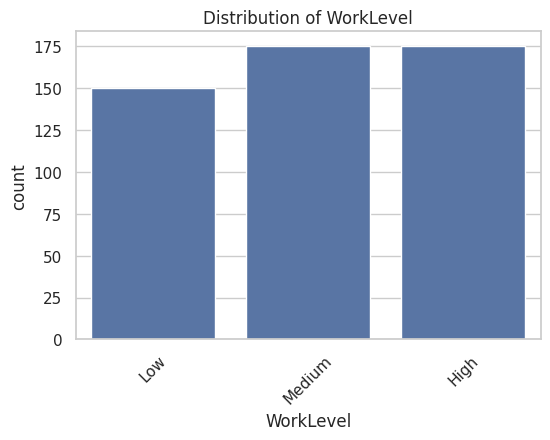

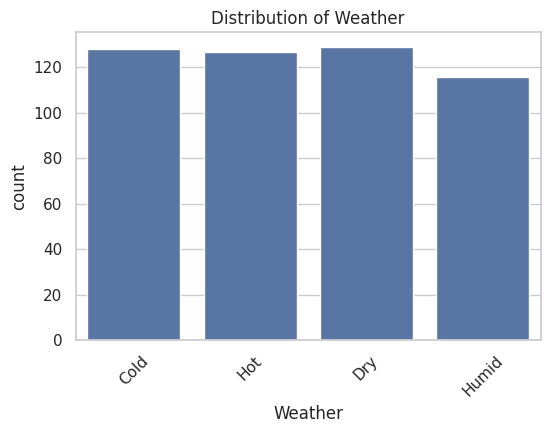

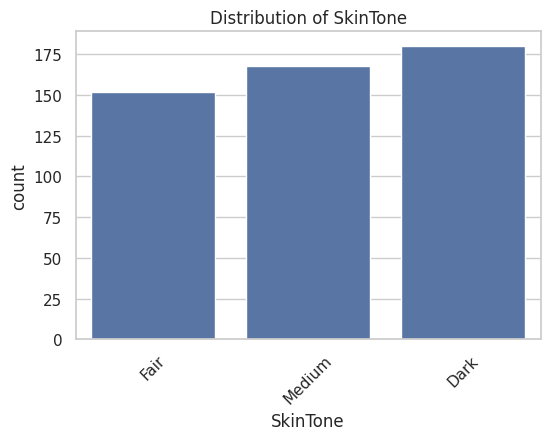

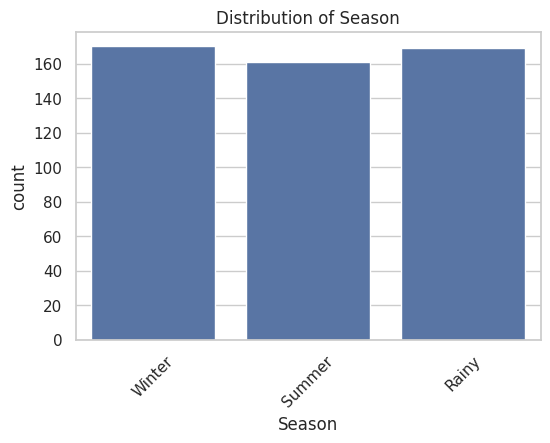


===== NEW FABRIC GROUP DISTRIBUTION =====
FabricGroup
Breathable    253
Synthetic     150
Warm           55
LightSoft      28
Denim          14
Name: count, dtype: int64

===== MODEL RESULTS =====
Accuracy: 0.63

Classification Report:

              precision    recall  f1-score   support

  Breathable       0.67      0.81      0.74        48
       Denim       0.50      0.33      0.40         3
   LightSoft       0.67      1.00      0.80         2
   Synthetic       0.52      0.35      0.42        34
        Warm       0.64      0.69      0.67        13

    accuracy                           0.63       100
   macro avg       0.60      0.64      0.60       100
weighted avg       0.61      0.63      0.61       100


Model saved as fabric_model.pkl


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
import pickle

# ============================================
# 1. LOAD DATA
# ============================================
df = pd.read_csv("/content/fabric_recommendation_dataset.csv")

print("===== HEAD =====")
print(df.head())

print("\n===== INFO =====")
print(df.info())

print("\n===== DESCRIBE =====")
print(df.describe(include="all"))

print("\n===== NULL VALUES =====")
print(df.isnull().sum())

print("\n===== UNIQUE VALUES =====")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique")

print("\n===== CLASS DISTRIBUTION (Original Fabrics) =====")
print(df["Fabric"].value_counts())

# ============================================
# 2. EDA (DISPLAY ONLY – DOES NOT SAVE IMAGES)
# ============================================
print("\nShowing distribution plots...\n")

sns.set(style="whitegrid")
plt.figure(figsize=(7,5))
sns.countplot(data=df, x="Fabric")
plt.xticks(rotation=45)
plt.title("Fabric Class Distribution")
plt.show()

for col in ["WorkLevel", "Weather", "SkinTone", "Season"]:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

# ============================================
# 3. RE-MAP FABRIC CLASSES (FOR HIGH ACCURACY)
# ============================================
fabric_map = {
    "Cotton": "Breathable",
    "Linen": "Breathable",
    "Rayon": "Breathable",

    "Polyester": "Synthetic",
    "Nylon": "Synthetic",

    "Wool": "Warm",
    "Velvet": "Warm",

    "Satin": "LightSoft",
    "Silk": "LightSoft",
    "Chiffon": "LightSoft",
    "Georgette": "LightSoft",

    "Denim": "Denim"
}

df["FabricGroup"] = df["Fabric"].map(fabric_map)

print("\n===== NEW FABRIC GROUP DISTRIBUTION =====")
print(df["FabricGroup"].value_counts())

# ============================================
# 4. FEATURE + TARGET SPLIT
# ============================================
X = df[["Season", "SkinTone", "Weather", "WorkLevel"]]
y = df["FabricGroup"]

# ============================================
# 5. ENCODING
# ============================================
ohe = OneHotEncoder(handle_unknown='ignore')
X_encoded = ohe.fit_transform(X)

le = LabelEncoder()
y_encoded = le.fit_transform(y)

# ============================================
# 6. TRAIN / TEST SPLIT
# ============================================
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded, test_size=0.2, random_state=42
)

# ============================================
# 7. TRAIN MODEL
# ============================================
model = RandomForestClassifier(n_estimators=300, max_depth=10)
model.fit(X_train, y_train)

# ============================================
# 8. MODEL EVALUATION
# ============================================
y_pred = model.predict(X_test)

print("\n===== MODEL RESULTS =====")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# ============================================
# 9. SAVE FINAL MODEL (ONLY ONE FILE)
# ============================================
with open("fabric_model.pkl", "wb") as f:
    pickle.dump({"model": model, "encoder": ohe, "label": le}, f)

print("\nModel saved as fabric_model.pkl")
